# **ÁRBOLES DE DECISIÓN**

![Return of the Jedi](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Returnofthejedi-logo2.svg/1920px-Returnofthejedi-logo2.svg.png)

Fuente de la imagen: https://es.wikipedia.org

![Endor](https://static.wikia.nocookie.net/starwars/images/f/f9/TempestForceEndor-ROTJ.png)

Fuente de la imagen: https://static.wikia.nocookie.net/starwars

## **1. Introducción a la librería Scikit-Learn**

Antes de empezar con los árboles de decisión quiero presentaros, si no la conocéis ya, la librería de Machine Learning en python por excelencia: Sciki-Learn.

https://scikit-learn.org/stable/

Como podréis ver si entráis en el link anterior veréis la división inicial que hace sobre sus diversas funcionalidades:
* **Classification**: algorimos supervisados de clasificación para predecir variables discretas. Ejemplo: detección de spam/no-spam
* **Regression**: algoritmos supervisados de regresión para predecir variables continuas. Ejemplo: estimación de precios de automóviles
* **Clustering**: algoritmos no supervisados para la búsqueda de patrones homogéneos en los datos. Ejemplo: segmentación de clientes según sus características
* **Dimensionality Reduction**: algoritmos no supervisados para la reducción del número de variables. Ejemplo: datasets con alto número de variables frente al número de muestras (muy usado en investigación científica en la rama de la salud)
* **Model Selection**: herramientas para la optimización de los valores de los parámetros en los algoritmos anteriores. Ejemplo: validación cruzada
* **Preprocessing**: herramientas para la mejora de los datos antes de introducirlos como entrada a un algoritmo. Ejemplo: estandarización o normalización de datos antes de aplicar una regresión lineal o un KNN (como veremos en este módulo)

En cuanto a la forma de programar, veremos que es sencillo y que lo importante va a ser conocer bien qué herramienta o algoritmo vamos a usar y con qué parámetros.

![sklearn_esquema](http://scikit-learn.org/stable/_static/ml_map.png "Title")

Fuente de la imagen: https://scikit-learn.org/




## **2. Introducción a los Árboles de Decisión**

El algoritmo de Árboles de Decisión (a continuación, **AD**) es un algoritmo muy utilizado en cualquier sector por su facilidad de uso y porque sirve de ayuda para entender los datos con los que se está trabajando.

Hay que tener en cuenta que cada AD lleva acompañado un grafo en el que se indica las variables que se utilizan para tomar decisiones y los valores límite a partir de los cuales el algoritmo entiende que nos va a permitir predecir mejor nuestra variable objetivo.
Para entenderlo mejor vamos a ver uno de ellos:

![AD_Titanic](https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg "Titanic")

Fuente de la imagen: https://wikimedia.org

Si lanzamos un algoritmo de AD sobre un dataset sobre información de los pasajeros del Titanic con la intención de crear un modelo que sea capaz de estimar si una persona “fallece” o “sobrevive” podríamos tener algo como el grafo anterior. El algoritmo ha decido que, entre todas las características de los pasajeros, la primera a usar (lo que ya nos dice de su importancia) es el género. Por tanto, que nos movamos a la rama de la derecha o de la izquierda ya supone una mayor posibilidad a fallecer o sobrevivir. También utiliza la edad y el número de parientes a bordo. 

Por tanto, la probabilidad de fallecer es del 61% si eran hombres mayores de 9,5 años.

*¿Qué tipo de algoritmo es?*: Supervisado y de Clasificación

*¿Cuál era la probabilidad de sobrevivir si eras hombre, de menos de 9,5 años y con menos de 3 parientes a bordo?* 2%

Los AD se pueden usar de manera individual o en algoritmos ensamblados (como los que veremos en la segunda parte del módulo) del tipo Random Forest o Gradient Boosting. Estos algoritmos combinan los AD de diferentes formas para crear otros más potentes y robustos.

Otra de sus propiedades es que, en el caso de que sean sencillos, podemos programarlos con estructuras de tipo “if/else”. De esta manera podremos usar el AD como guía para realizar la programación (con los cambios que estimemos necesarios debido a nuestra comprensión del problema) como nosotros queramos. 

Los AD son algoritmos de tipo *White Box (Caja Blanca)* porque sabemos cómo se comporta en cada situación. La posibilidad de usarlos de base para nuestro propio algoritmo “if/else” es una posibilidad muy potente. Nos ofrece gran flexibilidad, al poder “tocar” los valores y las decisiones cuando lo necesitemos.
<br>
<p><mark>RECUERDA </mark></p>
<hr>

El algoritmo de AD de Scikit-Learn está basado en el denominado *CART (Classification and Regression Tree)* que sólo se subdivide en dos ramas por cada decisión. Existen otros algoritmos como el ID3 que puede dividirse en más de 2 ramas por decisión. Sin embargo, lo habitual es encontrarnos con algoritmos tipo CART. 





## **3. Clasificación**
Para ver cómo funciona por dentro un AD vamos a utilizar un ejemplo. Vamos a suponer que tenemos dos variables predictoras continuas $X_{1}$ y $X_{2}$ de la variable discreta objetivo $Y (verde/rojo)$. Queremos dividir el plano en semiplanos en los que podamos tener el mayor número de bolas verdes y rojas por separado. Para ello aplicamos un AD. Pasos:

1. Recorre todos los valores de  $X_{1}$  de las muestras “lanzando” rectas verticales y calculando errores de clasificación (que veremos más tarde)
2. Recorre todos los valores de $X_{2}$ de las muestras “lanzando” rectas horizontales y calculando errores de clasificación 
3. Se queda con la línea que mejor separa los puntos verdes y rojos. En nuestro caso, con la línea horizontal $X_{2}= 115$ 
4. El proceso se repite de nuevo para cada uno de los semiplanos que se han generado. Así de nuevo hasta que pare por alguna condición que establezcamos (y que también veremos después)

*Estado Inicial de los puntos de un dataset cualquiera con dos variables $X_{1}$ y $X_{2}$, coloreados según la clase a la que pertenecen*

![](https://drive.google.com/uc?export=view&id=1igKei1kk-2V48_jwR640uwyc5Z1e9xbX)

*Después de una serie de decisiones vemos cómo se van creando semiplanos con mayoría de puntos verdes o rojos*

![](https://drive.google.com/uc?export=view&id=16hWLxRF2JlFJbYSZqepy4wZQ127zzRgA)

*Grafo de AD resultante*

![](https://drive.google.com/uc?export=view&id=15ZJdDNK_EYEs3VUaefqYlqltuif78-yt)


<br>
<p><mark>RECUERDA </mark></p>
<hr>
Vamos a establecer la siguiente nomenclatura:

* Profundidad: un árbol es más profundo cuantas más ramas tiene

* Niveles: cada una de las decisiones se establece dentro de un nivel. En el dibujo anterior, tenemos 3 niveles y se cuentan de arriba a bajo

* Nodos: son cada una de las cajas del árbol

* Nodos decisión: cajas grises donde se presenta una condición Xi menor que un cierto valor.

* Nodos hoja: son los nodos finales a partir de los cuales ya no hay decisiones sino una posible predicción. En el caso de arriba, las cajas rojas y verdes son nodos hoja

* Ramas: cada una de las flechas con Sí/No 




### **3.1. Programación en Python**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

In [25]:
make_moons

<function sklearn.datasets._samples_generator.make_moons>

In [26]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
print (X.shape)
print (y.shape)

(200, 2)
(200,)


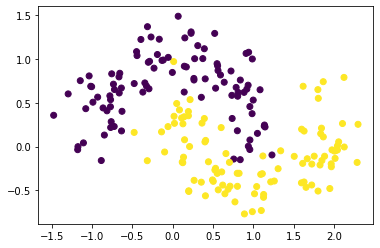

In [29]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3 )
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

In [30]:
print (sum(y_train==0))
print (sum(y_train==1))
print (sum(y_test==0))
print (sum(y_test==1))

70
70
30
30


In [31]:
md = None
tree_model = DecisionTreeClassifier(random_state=0, max_depth=md)
tree_model.fit(X_train, y_train)
pred_train = tree_model.predict(X_train)
pred_test = tree_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*tree_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*tree_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 100.00
Precisión sobre los datos de test: 96.67


### **3.2. Grafo en Python e Interpretación**

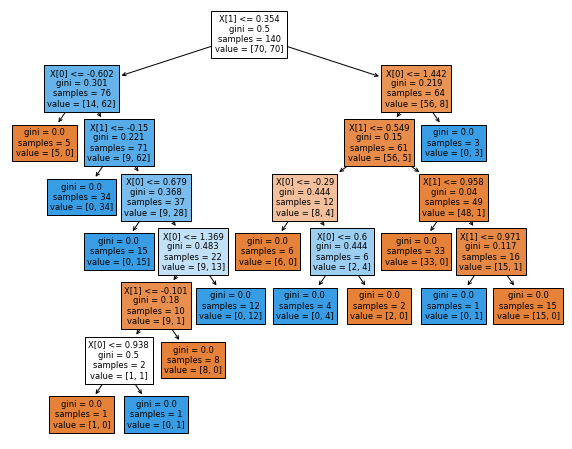

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
plt.figure(figsize=(10,8))
plot_tree(tree_model, filled=True, max_depth=md)
plt.show()

In [33]:
def plot_boundaries_test(XX, YY, model, proba, XXtest, YYtest):

    plot_step = 0.1

    x_min, x_max = XX[:, 0].min() - 0.5, XX[:, 0].max() + 0.5
    y_min, y_max = XX[:, 1].min() - 0.5, XX[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    ## https://interactivechaos.com/es/manual/tutorial-de-numpy/la-funcion-meshgrid
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    if proba:
      pred = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
      pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    cs = plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.5)

    plt.xlabel("X1")
    plt.ylabel("X2")

    scatter = plt.scatter(x=XXtest[:,0], y=XXtest[:,1], c=YYtest, 
                cmap=plt.cm.RdYlBu, edgecolor='black'
                )

    plt.suptitle("Áreas definidas por el Árbol de Decisión")
    # produce a legend with the unique colors from the scatter
    legend1 = plt.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    plt.axis("tight")
    plt.show()

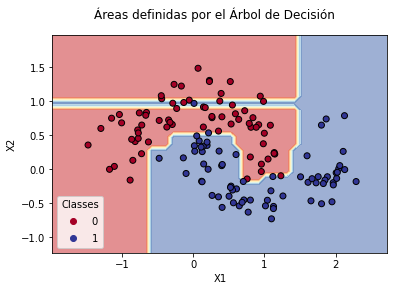

In [36]:
plot_boundaries_test(X_train, y_train, tree_model, False, X_train, y_train)

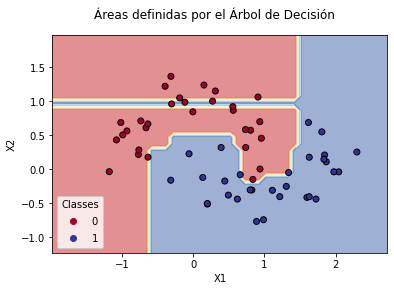

In [37]:
plot_boundaries_test(X_train, y_train, tree_model, False, X_test, y_test)

**Vamos a trabajar con funciones** 

In [38]:
def entrenar_modelo(X,y,md):
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3 )
  print (X_train.shape, y_train.shape)
  print (X_test.shape, y_test.shape)

  tree_model = DecisionTreeClassifier(random_state=0, max_depth=md)
  tree_model.fit(X_train, y_train)
  pred_train = tree_model.predict(X_train)
  pred_test = tree_model.predict(X_test)
  print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*tree_model.score(X_train, y_train)))
  print("Precisión sobre los datos de test: {:.2f}".format(100.0*tree_model.score(X_test, y_test)))

  return tree_model

In [39]:
def dibujar_arbol(tree_model):
  plt.figure(figsize=(10,8))
  plot_tree(tree_model, filled=True, feature_names=["X1","X2"], class_names=["0","1"])
  plt.show()

In [40]:
def crear_puntos(n, noise):  
  X, y = make_moons(n_samples=n, noise=noise, random_state=42)
  plt.scatter(x=X[:,0], y=X[:,1], c=y)
  plt.show()
  return X, y

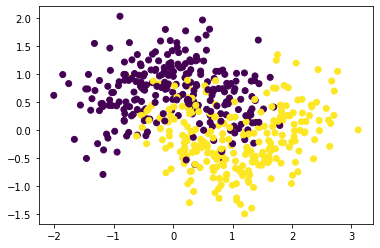

(350, 2) (350,)
(150, 2) (150,)
Precisión sobre los datos de entrenamiento: 88.57
Precisión sobre los datos de test: 82.00


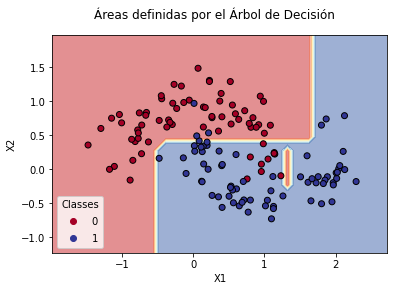

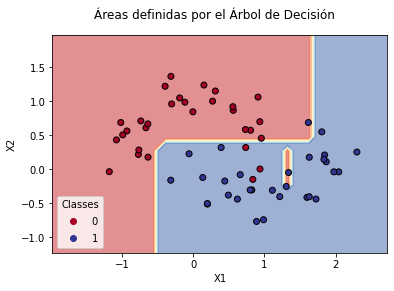

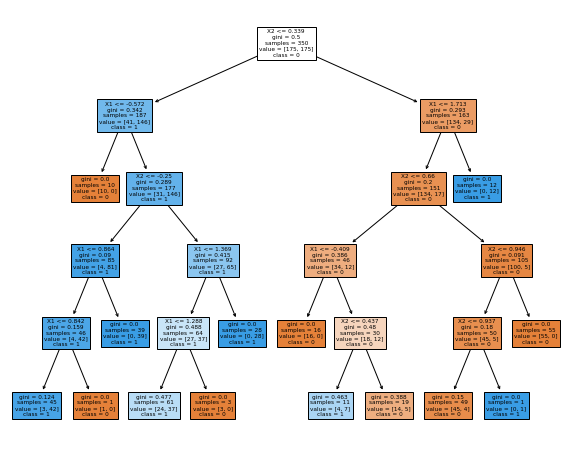

In [42]:
  n_samples = 500
  noise=0.4
  max_depth = 5
  X, y = crear_puntos(n_samples, noise)
  tree_model = entrenar_modelo(X,y,max_depth)
  plot_boundaries_test(X_train, y_train, tree_model, False, X_train, y_train)
  plot_boundaries_test(X_train, y_train, tree_model, False, X_test, y_test)
  dibujar_arbol(tree_model)

### **3.3. Función de Coste**
Ya hemos dicho que el funcionamiento del algoritmo se basa en el cálculo de la mejor combinación Variable – Condición posible en cada altura del árbol. 

Pero, ¿cómo sabe cuál es esa mejor combinación?. Lo consigue mediante el cálculo del mínimo de una Función de Coste. 

Vamos a ir paso a paso. La función de coste es la siguiente:

$$ \bbox[5px,border: 1px solid blue]{J(v_{i},c_{j}) = \frac{m_{izq}}{m}*I_{izq}+\frac{m_{der}}{m}*I_{der}} $$

 
Donde:

$I_{izq/der}$ es la “impureza” de las posibles hojas que resultantes de una decisión; una a la derecha y la otra a la izquierda.

$m_{izq/der}$ es el número de muestras resultantes en las posibles hojas, a derecha e izquierda.

$m$ es el número total de muestras de entrenamiento.

### **3.4. Concepto de “impureza”**
Su cálculo se puede llevar a cabo atendiendo a dos criterios. Si vamos a la página web de Scikit-Learn sobre Decission Trees Classifier 

(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) 

podemos ver que el primer parámetro que aparece es “criterion” y nos da dos opciones: “gini” y “entropy”. Vamos a cómo es el cálculo de cada una de ellas. De esta forma, podremos entender a qué nos referimos con “impureza”. 

#### **3.4.1. Gini**

La fórmula de Gini es la siguiente:

$$ {G_{km}=1-\sum_{k=1}^{n} p_{km}{^2}} $$
 
Donde:

$p_{km}$ es la proporción de la clase K entre todas las muestras del nodo “m”.

Lo mejor es verlo con un ejemplo. Si miramos el último árbol de decisión graficado podemos ver lo siguiente:

$G_{11} = 1- {(\frac{81}{85}){^2}} - {(\frac{4}{85}){^2}} = 0.09 $

$G_{12} = 1- {(\frac{27}{92}){^2}} - {(\frac{65}{95}){^2}} = 0.415 $


In [ ]:
print (1-(81/85)**2 - (4/85)**2)
print (1-(27/92)**2 - (65/92)**2)

#### **3.4.2. Entropy**

La fórmula de la Entropía es la siguiente:

$$ {E_{km}=-\sum_{i=1}^{k} p_{km}{log({p_{km}})}} $$
 
Donde:

$p_{im}$ vuelve a ser la proporción de la clase K entre todas las muestras del nodo “m”.

Siguiendo con el ejemplo anterior tenemos:

$E_{11} = - (\frac{4}{85}){\log(\frac{4}{85})} - (\frac{81}{85}){\log(\frac{81}{85})} = 0.189 $




In [ ]:
-(4/85)*np.log(4/85)-(81/85)*np.log(81/85)

### **3.5. Probabilidad de las estimaciones en clasificación**
Scikit-Learn nos da la posibilidad de calcular la probabilidad con la que se ha predicho que cierta muestra objetivo es de una clase u otra.
Es tan sencillo como escribir:

```
clf_tree_model.predict_proba([[X1, X2, X3, …, Xn]]
```

donde $X_{i}$ son los valores de las diferentes variables predictoras. Esto nos devolverá una probabilidad para cada una de las clases del modelo. Lo que hace esta función es recorrer el árbol, teniendo en cuenta los valores que le demos de cada variable predictora.

Atendiendo al ejemplo anterior tendríamos lo siguiente:

Para  $X_{1} = 0$ y $X_{2} = 0.5 $, al bajar por el árbol llegaríamos al nodo hoja donde Gini = 0.386 con 46 samples, value=[34,12] y class=0

*probabilidad(clase=0) = 34/46 = 0.74 --> 74%*

*probabilidad(clase=1) = 12/46 = 0.26 --> 26%*

El cálculo final es una simple fracción:

$$ Probabilidad(clase=i): N_{i}/N $$

Donde:

$N_{i}$ es el número de muestras de la clase $i$ en el nodo hoja.

$N$ es el número total de muestras de entrenamiento



### **3.6. Pasos en la generación de un árbol de decisión**
Una vez hemos visto todo lo anterior, vamos a ponerlo en contexto mediante la explicación paso a paso de su creación:
1. Para cada variable predictora $X_{i}$ recorre todos los valores de todas sus muestras de entrenamiento. Si en el dataset existen 10.000 filas con 4.000 valores diferentes, recorre los 4.000 valores, calculando la función de coste para cada uno de ellos. Recuerda que para la función de coste es preciso calcular la impureza, ya sea con Gini o con Entropy
2. Una vez tiene calculada la función de coste de cada posible decisión, se queda con la que devuelve el menor valor. Por ejemplo: $X_{3}<150$. 

Estos dos pasos se llevan a cabo todo el tiempo hasta que se cumpla una de las siguientes condiciones:
* Ha llegado a un nodo en el que sólo hay muestras de una clase. Este nodo será un nodo hoja.
* No encuentra una nueva decisión que reduzca la impureza del último nodo. Es posible en un AD con tres clases tengamos un nodo con [120,5,1] y no encuentre una decisión que mejore esa distribución, como podría ser [121,4,1] 
* Hemos determinado una profundidad máxima del AD con “**max_depth**” u otros parámetros que veremos en el punto de regularización.

<br>
<p><mark>RECUERDA </mark></p>
<hr>


Cuanto más profundo es un AD más posibilidades hay de que cometa overfitting sobre los datos de entrenamiento. Por eso va a ser muy importante tomar medidas para detener ese avance. Veremos cómo podemos **"podar"** el AD; lo que viene denominándose **"pruning"**.

## **4. Regresión**
Vamos a ver cómo se trabajan los AD cuando queremos predecir variables continuas.

En líneas generales el AD se genera de la misma forma que en clasificación. Sin embargo, hay ciertas diferencias:

* En Regresión los AD no trabajan con el cálculo de impurezas sino con MSE (Mean Squared Error)
* Cuando llega a un nodo hoja (nodo final) lo que hace es la media de los valores de la variable objetivo para las muestras que hay en ese nodo. Es decir, si en un nodo final tenemos: 
$$ samples=20; mse = 1.23; value=15.21$$

  lo que nos dice es que 15.21 es la media de los valores de $Y$ de las 20 muestras.




### **4.1. Programación en Python**
Vamos a ver un ejemplo.

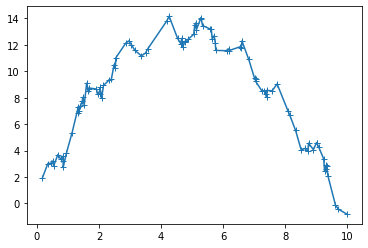

In [43]:
x = 10 * np.random.rand(100)
x = np.sort(x)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    trend = -0.5*x**2+5*x
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise + trend

y = model(x)
plt.plot(x, y, marker='+');

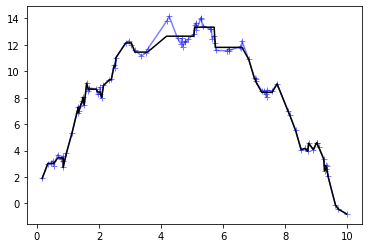

In [47]:
from sklearn.tree import DecisionTreeRegressor

y_pred = DecisionTreeRegressor(max_depth=7).fit(x[:, None], y).predict(x[:, None])

plt.plot(x, y, marker='+', c="blue", alpha=0.5);
plt.plot(x, y_pred, '-k', c = "black");

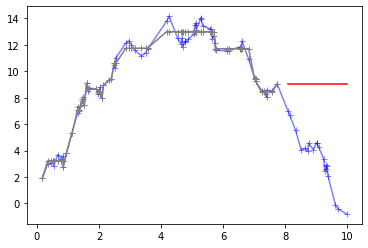

In [48]:
x_forecast = x[80:100, None]
y_forecast = y[80:100]
x_train = x[0:80, None]
y_train = y[0:80]

tree_reg = DecisionTreeRegressor(max_depth=5).fit(x_train, y_train)
y_pred_train = tree_reg.predict(x_train)
y_forecast = tree_reg.predict(x_forecast)

plt.plot(x, y, marker='+', c="blue", alpha=0.5);
plt.plot(x_train, y_pred_train, marker='+', c="gray");
plt.plot(x_forecast, y_forecast, '-k', c = "red");

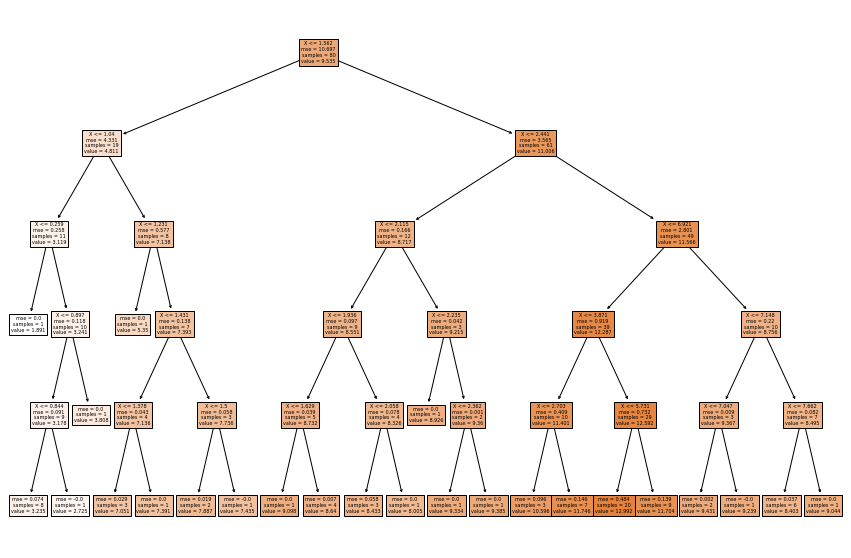

In [49]:
plt.figure(figsize=(15,10))
plot_tree(tree_reg, filled=True, feature_names=["X"])
plt.show()

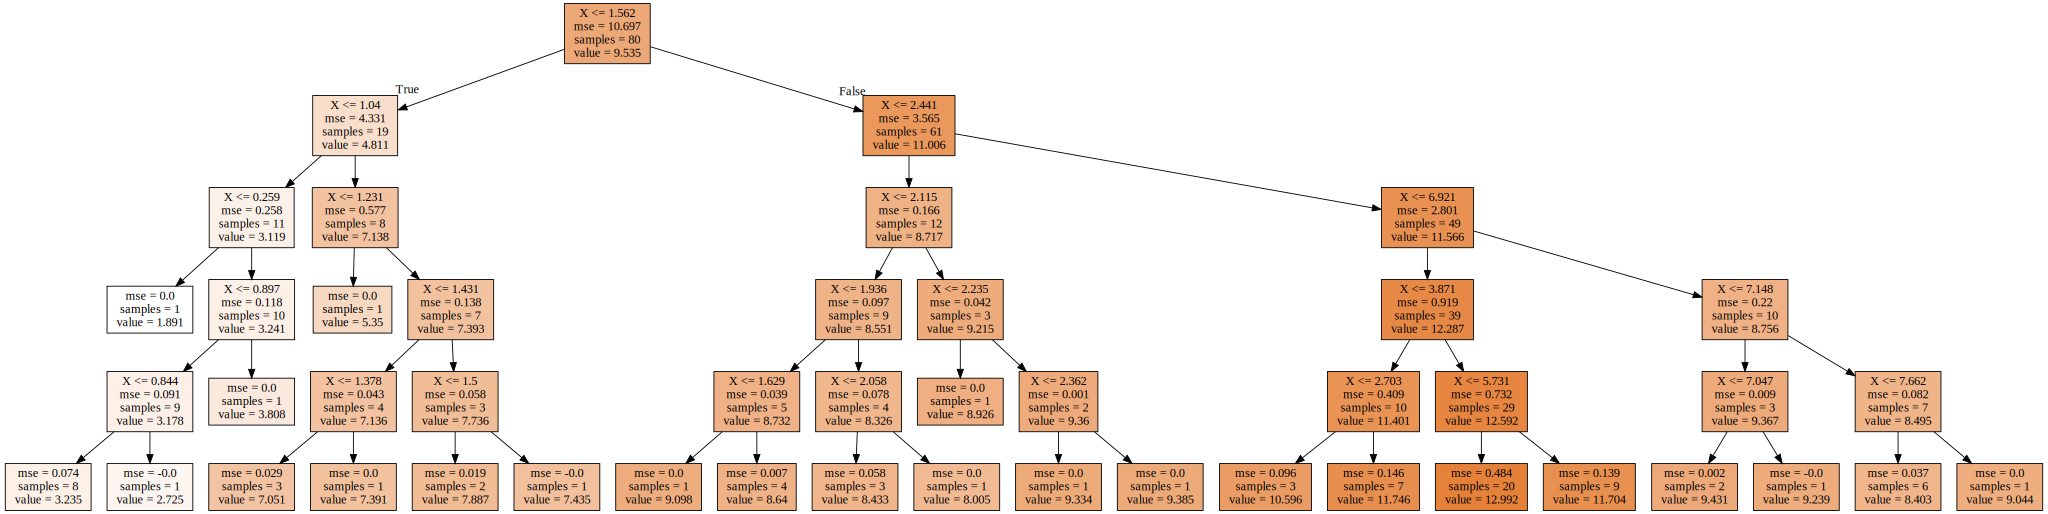

In [50]:
import graphviz
dot_data = export_graphviz(tree_reg, out_file=None, 
                                feature_names=["X"],  
                                filled=True)
graphviz.Source(dot_data, format="png")

### **4.2. Función de Coste y MSE**
La función de coste a minimizar en cada una de las decisiones de una AD en Regresión es:

$$ \bbox[5px,border: 1px solid blue]{J(v_{i},c_{j}) = \frac{m_{izq}}{m}*MSE_{izq}+\frac{m_{der}}{m}*MSE_{der}} $$

donde:

$$ {MSE_{nodo}=\sum_{i=1}^{nodo} (y_{pred}-y_{real}{^î}){^2}} $$

$y_{pred} $ es la media de los $y_{real}$

## **5. Overfitting y underfitting**
Aunque ya hemos hablado de estos dos conceptos quisiera dejar claro cuándo es posible que ocurran al trabajar con AD.

**Underfitting**

Recordemos que se produce cuando disponemos de un modelo tan sencillo que no es capaz de ajustarse a la variabilidad de los datos de entrenamiento. La consecuencia más directa es que vamos a tener un rendimiento (precisión y $R^2$ ) muy pobres, tanto en entrenamiento como en test.

En el caso de los modelos de Regresión Lineal ocurría cuando usábamos pocas variables predictoras; por ejemplo, una simple recta: $Y = a + bX$ 

En los AD podemos decir que nuestro modelo sufre de underfitting cuando le ocurren cualquiera de las dos condiciones:
* No estamos usando suficientes variables predictoras (o no son las que mejor ajustan)
* Tenemos un AD demasiado pequeño, con muy pocos niveles para lo que la variedad de los datos precisa.

**Overfitting (sobreajuste)**

Nos encontramos con todo lo contrario. El modelo ajusta demasiado a los datos de entrenamiento. Tanto que no es capaz de generalizar cuando le damos nuevas muestras a predecir. Esto ocurría en nuestro primer AD del tema, donde se producía una decisión para poder ajustar a un sólo punto.

Cuando esto sucede suele ocurrir que $R^2$ y la precisión sobre los datos de entrenamiento son muy buenos pero sobre los datos de test son bastante peores.

Si dejamos a un AD trabajar sin límite de profundidad llegará hasta disponer de nodos hoja con puntos de una sola clase y cero del resto. 

En la figura podemos ver:
* en rojo cómo evoluciona el error de predicción sobre las muestras de test conforme elevamos el número de niveles de profundidad.

* en azul cómo evoluciona el error de predicción sobre las muestras de entrenamiento conforme elevamos el número de niveles de profundidad.

![Under-Over](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Overfitting_svg.svg/300px-Overfitting_svg.svg.png)

Fuente: https://en.wikipedia.org/wiki/Overfitting

Como se puede ver, hay un punto intermedio en el que conseguimos un balanceo entre un modelo sesgado y otro sobreajustado.

Existen dos formas de evitar el Overfitting (que hemos visto antes de pasada):
* **Pre-pruning (pre-podado)**: es el que permite hacer Scikit-Learn. Se trata de un podado de las ramas mediante el uso de parámetros que elegimos *antes* de lanzar el algoritmo.
* **Post-pruning (post-podado)**: es una técnica que reduce el tamaño de los árboles de decisión al eliminar secciones del árbol que no son críticas y son redundantes. La poda reduce la complejidad del clasificador final y, por lo tanto, mejora la precisión predictiva al reducir el sobreajuste. 




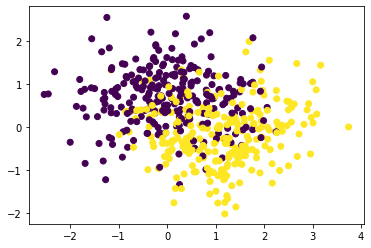

In [51]:
X, y = crear_puntos(n=500, noise=0.6)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3 )

md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeClassifier(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})


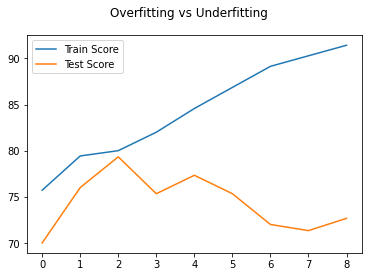

In [52]:
df.set_index("max_depth")
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

## **6. Regularización**
Por regularización entendemos el proceso de parametrización gracias al cuál somos capaces de evitar el overfitting.

Parámetros que nos van a ayudar:

* **max_depth** (por defecto a None --> profundidad ilimitada): ya lo hemos visto en acción en el ejemplo anterior 
* **min_samples_split** (por defecto a 2): es el número mínimo de muestras que un nodo debe tener para poder ser dividido.
* **min_samples_leaf** (por defecto a 1): número mínimo de muestras que puede haber en un nodo hoja (nodo final)
* **min_weight_fraction_leaf** (por defecto a 0.0): se trata de la proporción de muestras, respecto al número total, que puede haber en un nodo hoja (nodo final)
* **max_leaf_nodes** (por defecto a None --> ilimitado): es el número máximo de nodos hoja que puede tener el AD
* **max_features** (por defecto a None --> todas las variables predictoras): es el número máximo de variables predictoras que va a usar el AD.  



In [54]:
def entrenar_modelo_v2(X,y,md=None, mss=2, msl=1, mwfl=0.0, mln=None, mf=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3 )
  print (X_train.shape, y_train.shape)
  print (X_test.shape, y_test.shape)

  tree_model = DecisionTreeClassifier(random_state=0, 
                                      max_depth=md, # por defecto: None
                                      min_samples_split = mss, # por defecto: 2
                                      min_samples_leaf = msl, # por defecto: 1
                                      min_weight_fraction_leaf = mwfl, # por defecto: 0.0
                                      max_leaf_nodes = mln, # por defecto: None
                                      max_features = mf) # por defecto: None
  tree_model.fit(X_train, y_train)
  pred_train = tree_model.predict(X_train)
  pred_test = tree_model.predict(X_test)
  print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*tree_model.score(X_train, y_train)))
  print("Precisión sobre los datos de test: {:.2f}".format(100.0*tree_model.score(X_test, y_test)))

  return tree_model

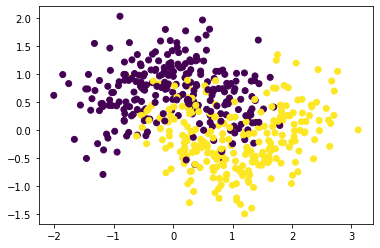

(350, 2) (350,)
(150, 2) (150,)
Precisión sobre los datos de entrenamiento: 86.29
Precisión sobre los datos de test: 85.33


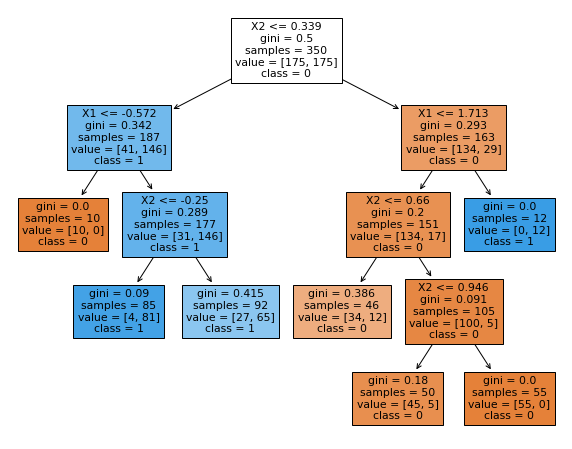

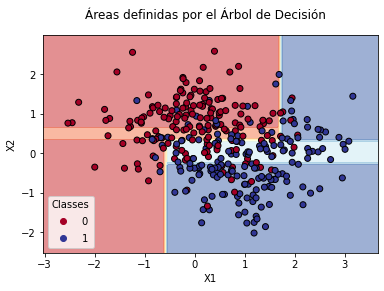

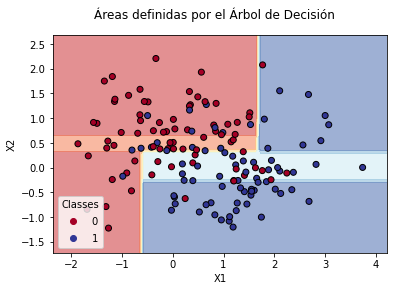

In [55]:
n_samples = 500
noise=0.4
max_depth = 3
X, y = crear_puntos(n_samples, noise)
tree_model = entrenar_modelo_v2(X, y, None, 100, 1, 0.0, None, None)
dibujar_arbol(tree_model)
plot_boundaries(X_train, y_train, tree_model)
plot_boundaries(X_test, y_test, tree_model)

## **7. Importancia de las variables**
Una de las características de los AD y que les da un plus de utilidad es que nos da un valor de importancia para cada una de las variables del modelo.

En los modelos de Regresión Lineal se obtiene un peso para cada una de las variables predictoras. Nos daba un valor concreto de la importancia de cada variable. Esto sólo ocurre en los modelos lineales.

La importancia que calcula un modelo basado en AD no establece un peso a multiplicar por cada variable. Se trata de un valor relativo que crea una jerarquización entre las variables que más aportan a la predicción y las que menos. De hecho, nos encontraremos ocasiones en las que esta importancia será 0. Eso nos dirá que podremos obviar la variable en concreto para el modelo ya que no se utiliza a lo largo del AD.

La simple sentencia:

```
tree_model.feature_importances_
```
nos devuelve lo que buscamos.


In [ ]:
print("Feature importances:")
print(tree_model.feature_importances_)

## **8. Velocidad de entrenamiento y predicción**
Un apunte rápido sobre este tema que puede ser importante en una futura puesta en producción:

* **Velocidad de entrenamiento**: recordemos que en el entrenamiento el AD pasa por todas las instancias para cada variable buscando la decisión óptima. Por tanto, es natural pensar que si disponemos de un dataset realmente largo (muestras) y ancho (variables) el tiempo se alargue bastante. Con parámetros como los vistos en la regularización, como "max_features" o "max_depth" podemos mejorar esos tiempos.

* **Velocidad de predicción**: los AD son muy rápidos prediciendo ya que sólo tienen que despalazarse por el árbol hasta el nodo hoja final.


## **9. Pros y contras de los Árboles de Decisión**
**Contras**:
* Puede hacer overfitting con facilidad si no se lleva cuidado
* No trabaja bien con datos tipo texto o imagen
* No son capaces de realizar predicciones fuera del rango en el que han sido entrenados.
* No son capaces de hacer "forecast" en series temporales porque se les entrena con una fechas (más antiguas) y se le pide predecir con otras fechas (más actuales).

**Pros**:
* No precisan de ningún tipo de escalado en el preprocesado, puede trabajar con los valores tal cual están en el dataset
* Son muy fáciles de interpretar; y en ocasiones de simular con algoritmos propios de "if/else"
* Nos dan la importancia de las variables predictoras
* Pueden usarse (como veremos en este módulo) para generar algoritmos más potentes 